In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Now, Linear regression

## House price

Load dataset about house price

In [17]:
#df = pd.read_csv('dataset.csv', sep = '\t')
df = pd.read_csv('https://github.com/shestakoff/hse_se_ml/blob/master/2020/s04-linear-regression/dataset.csv', sep = '\t')
df.index = range(len(df))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000's dollars

MEDV is target variable

Split to train and test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [20]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28,18.2


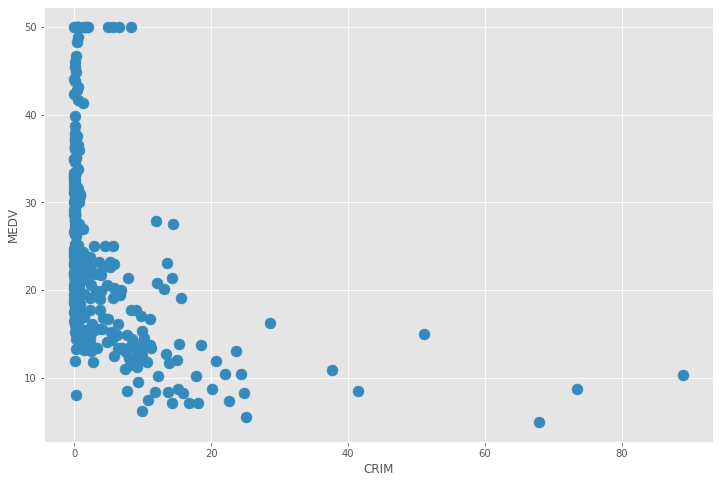

In [21]:
df_train.plot(x='CRIM', y='MEDV', kind='scatter', s=120)

We can see, less criminal $\rightarrow$ higher price (surprise)

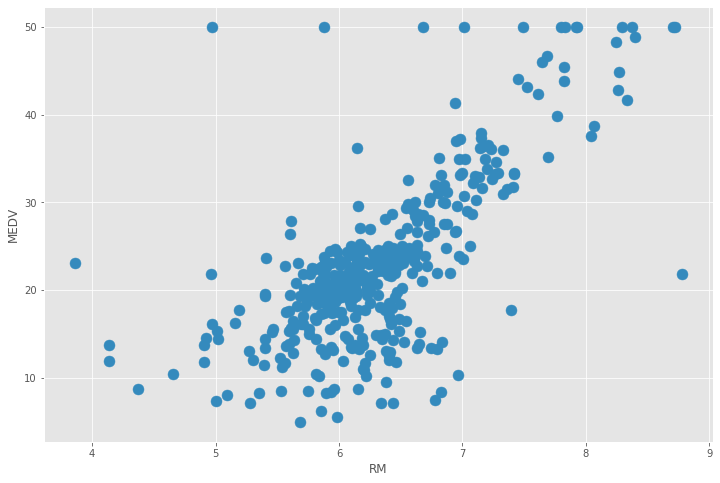

In [22]:
df_train.plot(x='RM', y='MEDV', kind='scatter', s=120)

Looks like there is linear dependence between rooms and price

In [23]:
class SimpleLinearRegression():
    def __init__(self, fit_intercept = True):
        self.coef_ = []
        self.intercept_ = 0.0
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        self._solve(np.copy(X), np.copy(y))
        

    def predict(self, X):
        #multiply X on self.coef and add intercept
        return X.dot(self.coef_) + self.intercept_

    
    def _solve(self, X, y):
        if self.fit_intercept:
            # Add constant feature 
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

        #analytical solution, A @ B is multiply A on B like matrix
        self.coef_ = np.matmul(np.linalg.inv(X.T @ X), X.T).dot(y)
        
        if self.fit_intercept:
            self.intercept_ = self.coef_[-1]
            self.coef_ = self.coef_[:-1]


In [24]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values

Train model

In [25]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)

In [26]:
print('Model:\nprice = %.2f + (%.2f)*rooms' % (model.intercept_, model.coef_[0]))

Model:
price = -36.25 + (9.35)*rooms


In [27]:
print('intercept = {}'.format(model.intercept_), 'coef = {}'.format(model.coef_[0]))

intercept = -36.24631889813552 coef = 9.348301406497349


### Question for student

What is the meaning of coefficients?

Plot your model prediction

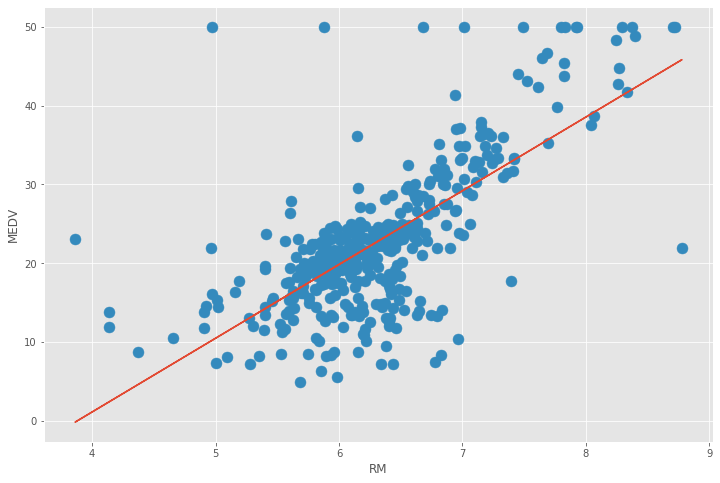

In [28]:
df_train.plot(x = 'RM', y = 'MEDV', kind = 'scatter', s=120)

#predict values
y_hat = model.predict(X_train)

plt.plot(X_train, y_hat)

Let's use all features

In [29]:
X_train = df_train.drop(columns = ['MEDV']).values
y_train = df_train.MEDV.values

In [30]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)

## Dummy Variables

A Dummy variable or Indicator Variable is an artificial variable created to represent an attribute with two or more distinct categories/levels.

### Task
* Read "accord_sedan_training.csv" dataset
* One-hot encoding for "trim", "engine", "transmission"
* Try to fit Model
* Why it don't fit?

### Dummy Variable Trap

The Dummy Variable trap is a scenario in which the independent variables are multicollinear — a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others.

In order to avoid dummy variable trap, we always declare one less dummy variable (n-1) than the categorical values (n).

### Task
* Encode categorical variable avoiding dummy variable trap.

## Logarithmic Transformation

Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively. In theory, we want to produce the smallest error possible when making a prediction, while also taking into account that we should not be overfitting the model. 

Overfitting occurs when there are too many dependent variables in play that it does not have enough generalization of the dataset to make a valid prediction. Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

Text(0.5, 0, 'Price')

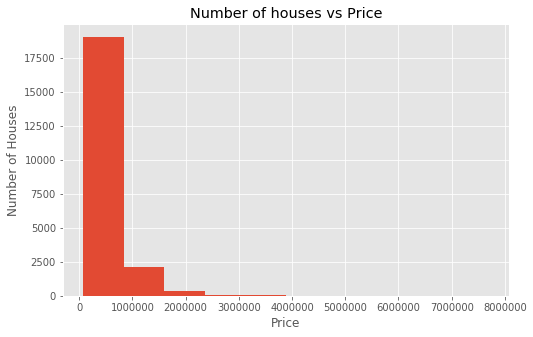

In [10]:
#Dataset https://www.kaggle.com/shivachandel/kc-house-data

#kchouse_data = pd.read_csv('kc_house_data.csv') 
kchouse_data = pd.read_csv('https://github.com/shestakoff/hse_se_ml/blob/master/2020/s04-linear-regression/kc-house-data.csv') 

kchouse_data.hist('price',figsize=(8,5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")

Text(0.5, 0, 'log(Price)')

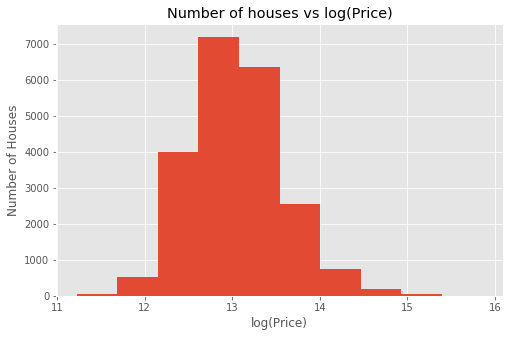

In [11]:
kchouse_data['log_price'] = np.log(kchouse_data['price'])

kchouse_data.hist('log_price',figsize=(8,5))
plt.title('Number of houses vs log(Price)')
plt.ylabel('Number of Houses')
plt.xlabel("log(Price)")

## Gradient descent

Not always we can use analytical solution, for example if matrix X is too large and we can't invert it. In this case we use gradient descent

In [42]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values

In [43]:
# adding a column of "1" into matrix
X_model = np.c_[np.ones(X_train.shape), X_train]
X_model.shape

(404, 2)

In [44]:
X_model[:10]

array([[1.   , 5.304],
       [1.   , 5.834],
       [1.   , 6.031],
       [1.   , 6.103],
       [1.   , 5.727],
       [1.   , 6.431],
       [1.   , 6.037],
       [1.   , 6.383],
       [1.   , 6.152],
       [1.   , 6.852]])

In [45]:
def gradient_descent(X, y, iters, alpha):
    costs = []
    betas = []
    
    n = y.shape[0] 
    Beta = (np.random.rand(X.shape[1]) - 0.5) * 1000 #random variable between -1000 and 1000
    for i in range(iters):
        y_hat = X.dot(Beta)
        
        # Calculate residuals and error
        resid = y_hat - y
        cost = (resid**2).mean()
        costs.append(cost)
        
        # Calculate gradient
        grad = X.T.dot(resid)

        # Update weights
        Beta = Beta - (alpha/n)*grad
        betas.append(Beta)
                    
    return Beta, costs, betas

In [46]:
Beta, _, _, = gradient_descent(X_model, y_train, 100, 0.05)

In [47]:
y_hat = X_model.dot(Beta)
print('MSE %.2f' % mean_squared_error(y_train, y_hat))

MSE 7812093042.02


Not so good, compare with our SimpleLinearRegression

In [30]:
model = SimpleLinearRegression(fit_intercept = False)
model.fit(X_model, y_train)
y_hat = model.predict(X_model)
print('MSE %.2f' % mean_squared_error(y_train, y_hat))

MSE 43.00


Why difference is so big? Add one row in our code

## Feature scaling

In [31]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values
X_train = (X_train - X_train.mean()) / X_train.std() #sub mean and div by std (scaling)

In [32]:
X_model = np.c_[np.ones(X_train.shape), X_train]
Beta, _, _, = gradient_descent(X_model, y_train, 100, 0.05)
y_hat = X_model.dot(Beta)
print('MSE %.2f' % mean_squared_error(y_train, y_hat))

MSE 47.56


### Question for student

Why feature scaling is usefull?

Feature scaling improves GD performance, but replaces interpretability

## Gradient descent visualization

In [33]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values
X_train = (X_train - X_train.mean()) / X_train.std() #sub mean and div by std (scaling)
X_model = np.c_[np.ones(X_train.shape), X_train]

In [34]:
from mpl_toolkits import mplot3d

Text(0, 0.5, '$\\beta_1$')

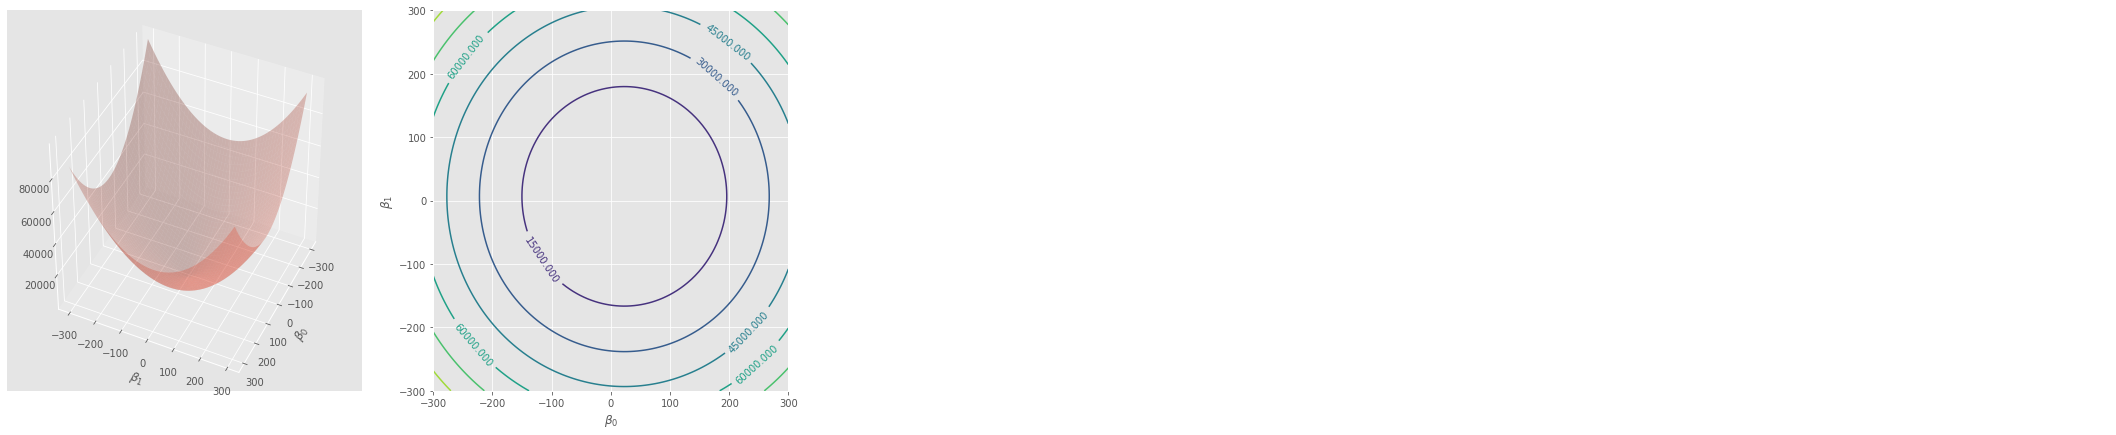

In [35]:
beta0 = np.linspace(-300 , 300, 100)
beta1 = np.linspace(-300, 300, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

General steps:

* Set random initial $\beta$
* Until converged:
    * Calculate residuals and error
    * Calculate gradients
    * Update coefs

In [36]:
Beta, costs, betas = gradient_descent(X_model, y_train, 100, 0.05)

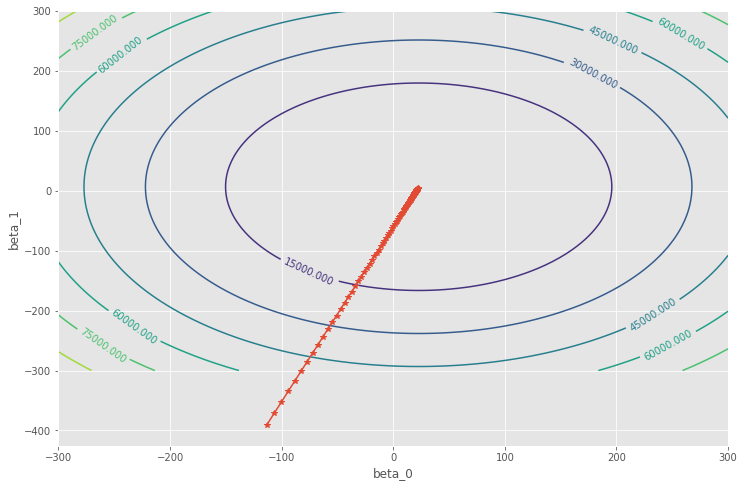

In [37]:
beta0 = np.linspace(-300, 300, 100)
beta1 = np.linspace(-300, 300, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)

fig, ax = plt.subplots(1,1)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

betas = np.array(betas)
ax.plot(betas[:,0], betas[:,1], marker='*')


### Questions for students
* What about adaptive learning rate?
* What stopping criteria for GD can you propose?

## Outliers

Squared error is very sensitive to outliers...

In [38]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values
n = y_train.shape[0]

In [39]:
## Add random outliers
for i in range(10):
    X_train = np.r_[X_train, [[np.random.rand()*20]]]
    y_train = np.r_[y_train, np.random.randn()*10]

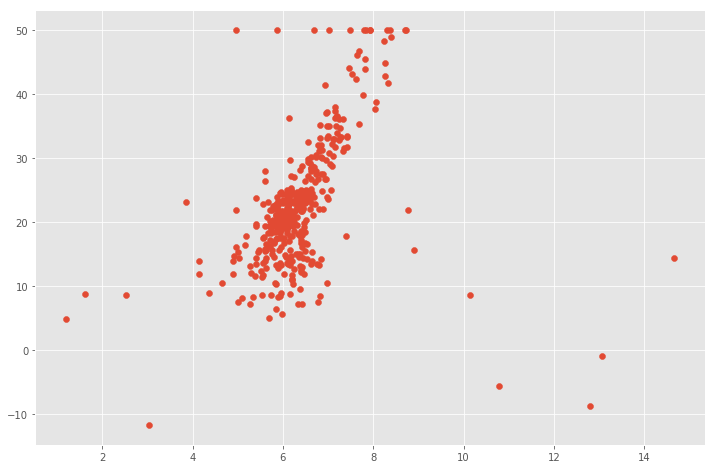

In [40]:
plt.scatter(X_train, y_train)

In [41]:
model = SimpleLinearRegression(fit_intercept=True)
model.fit(X_train[:n], y_train[:n])

model_ouliers = SimpleLinearRegression(fit_intercept=True)
model_ouliers.fit(X_train, y_train)

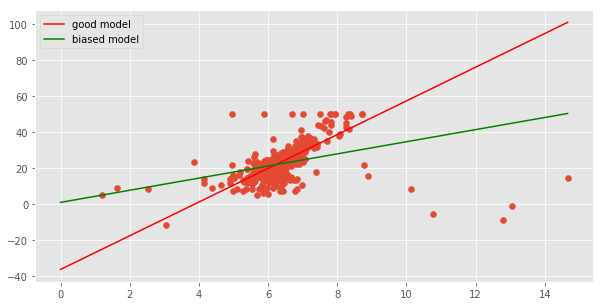

In [42]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model.predict(x)
y_hat_outliers = model_ouliers.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red', label='good model')
ax.plot(x, y_hat_outliers, c='green', label='biased model')
plt.legend()

## Regularization & restrictions

## Intuition

<center><img src=http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20[8].png>, width=800</center>
[Andrew's Ng Machine Learning Class - Stanford]

## Regularization 
* Regularization - technique that reduces model complexity to prevent overfitting
* Desired outcomes:
    * train loss goes up
    * test loass goes down
* Have we already seen it?

# Regularization 

* Insert additional requirement for regularizer $R(\beta)$ to be small:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda R(\beta)\to\min_{\beta}
$$
* $\lambda>0$ - hyperparameter.
* $R(\beta)$ penalizes complexity of models.
$$
\begin{array}{ll}
R(\beta)=||\beta||_{1} &  \mbox{(L1) Lasso regression}\\
R(\beta)=||\beta||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$

* Not only **accuracy** matters for the solution but also **model simplicity**!
* $\lambda$ controls complexity of the model:$\uparrow\lambda\Leftrightarrow\text{complexity}$$\downarrow$.

## Comments
* Dependency of $\beta$ from $\lambda$ for ridge (A) and LASSO (B):
<center><img src="img/regularization paths.png"></center>

* LASSO can be used for automatic feature selection.
* $\lambda$ is usually found using cross-validation on exponential grid, e.g. $[10^{-6},10^{-5},...10^{5},10^{6}]$.
* It's always recommended to use regularization because 
    * it gives smooth control over model complexity.
    * reduces ambiguity for multiple solutions case.

<center><img src=img/regul.jpg></center>

In [36]:
from sklearn.linear_model import Lasso, Ridge

In [37]:
df_auto = pd.read_csv('accord_sedan_training.csv')
#df_auto = pd.read_csv('https://github.com/shestakoff/hse_se_ml/blob/master/2020/s04-linear-regression/accord_sedan_training.csv')

df_auto = df_auto.assign(kilometrage = lambda r: r.mileage*1.6)
df_auto.loc[:, ['mileage', 'kilometrage', 'price']].head()

,mileage,kilometrage,price
0,67697,108315.2,14995
1,73738,117980.8,11988
2,80313,128500.8,11999
3,86096,137753.6,12995
4,79607,127371.2,11333


Модель:
price = 16762.02 + (-0.05)*mileage + (-0.00)*kilometrage


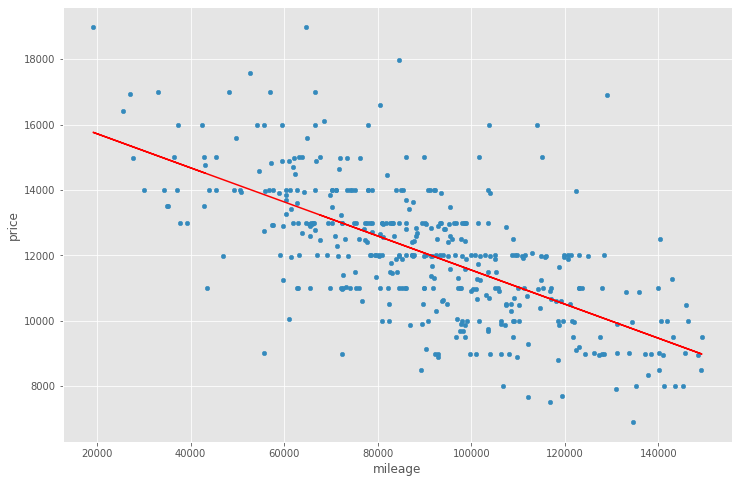

In [38]:
X_train = df_auto.loc[:, ['mileage', 'kilometrage']].values
y_train = df_auto.price.values

model = Lasso()
# model = Ridge()
model.fit(X_train, y_train)

print('Модель:\nprice = %.2f + (%.2f)*mileage + (%.2f)*kilometrage' % (model.intercept_, model.coef_[0], model.coef_[1],))

y_hat = model.predict(X_train)

df_auto.plot(x='mileage', y='price', kind='scatter')
_ = plt.plot(X_train[:, 0], y_hat, c='r')

## ElasticNet
* ElasticNet:

$$
R(\beta)=\alpha||\beta||_{1}+(1-\alpha)||\beta||_{2}^{2}\to\min_{\beta}
$$
$\alpha\in(0,1)$ - hyperparameter, controlling impact of each part. 

* If two features $x^{i}$and $x^{j}$ are equal: 
    * LASSO may take only one of them
    * Ridge will take both with equal weight
        * but it doesn't remove useless features
* ElasticNet both removes useless features but gives equal weight for usefull equal features
    * good, because feature equality may be due to chance on this particular training set